In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def get_hurst(x,y) : # binary search
    approx = []
    bmin = 0
    bmax = 3
    tol = 1.e-8
    
    b = bmin
    xb = x**(-b)
    dmin = np.sum(y*xb)*np.sum(xb**2*np.log(x))-np.sum(y*xb*np.log(x))*np.sum(xb**2)
    
    b = bmax
    xb = x**(-b)
    dmax = np.sum(y*xb)*np.sum(xb**2*np.log(x))-np.sum(y*xb*np.log(x))*np.sum(xb**2)
    
    increase = dmin < dmax
    
    while bmax-bmin > tol :
        b = 0.5*(bmin+bmax)
        approx.append(b)
        xb = x**(-b)
        d = np.sum(y*xb)*np.sum(xb**2*np.log(x))-np.sum(y*xb*np.log(x))*np.sum(xb**2)
        if d == 0 :
            break
        elif (np.bitwise_xor(increase,d < 0)) :
            bmax = b
        else :
            bmin = b
    
    approx.append(0.5*(bmin+bmax))
    #plt.plot(approx,color='red',marker='o')
    #plt.hlines([0.9],0,len(approx)-1,color='blue', linestyles='dashed')
    #plt.show()
    b = 0.5*(bmin+bmax)
    xb = x**(-b)
    c = np.sum(y*xb)/np.sum(xb**2)
    
    return b, c

def iter_hurst(x,y) :
    b0, c0 = get_hurst(x,y)
    rsd0 = np.average((y-c0*x**(-b0))**2)
    for i in range(1,int(len(x)/2)) :
        bi, ci = get_hurst(x[i:-1],y[i:-1])
        rsdi = np.average((y[i:-1]-ci*x[i:-1]**(-bi))**2)
        if rsd0 < rsdi :
            break
        b0 = bi
        c0 = ci
        rsd0 = rsdi
    return b0, c0

0.5410052994266152 0.6217959368318595
1.006557092074338 1.6105853853881382
1.103161378763616 2.446803578268381


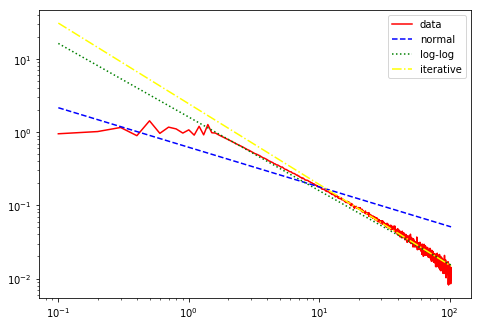

In [3]:
n = 1024
dx = 0.1
a = 0.9
c = 1.5
x = np.zeros(n, dtype=np.float64)

for i in range(n) :
    x[i] = (i+1)*dx
y = c*x**(-a) - 0.001*np.random.normal(11,2,n)

for i in range(n) :
    if y[i] > 1 :
        y[i] = 1- 0.1*np.random.normal(1,2,1)

plt.axes([0,0,1,1])
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,color='red',linestyle='-',label='data')

p,q = get_hurst(x,y)
print(str(p)+" "+str(q))
yh = q*x**(-p)
plt.plot(x,yh,color='blue',linestyle='--',label='normal')

p,q = np.polyfit(np.log(x),np.log(y),1)
p = -p
q = np.exp(q)
print(str(p)+" "+str(q))
yl = q*x**(-p)
plt.plot(x,yl,color='green',linestyle=':',label='log-log')

p,q = iter_hurst(x,y)
print(str(p)+" "+str(q))
yh = q*x**(-p)
plt.plot(x,yh,color='yellow',linestyle='-.',label='iterative')

plt.legend(loc='best')
plt.show()